Projekt SAD2 

Podstawowa informacja (zmienna y) : ( Klasa: jadalny = e, trujący = p)

Wiadomości o grzybach (zmienne x) :

- Informacje o czapeczce grzyba
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- Informacja o siniakach na grzybie
4. bruises: bruises=t,no=f

- Informacje o zapachu grzyba
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- Informacje o skrzeli grzyba
6. gill-attachment: attached=a,descending=d,free=f,notched=n

7. gill-spacing: close=c,crowded=w,distant=d

8. gill-size: broad=b,narrow=n

9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- Informacje o nóżce grzyba
10. stalk-shape: enlarging=e,tapering=t

11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- Informacje o zasłonce grzyba
16. veil-type: partial=p,universal=u

17. veil-color: brown=n,orange=o,white=w,yellow=y

- Informacje o obrysowaniu grzyba
18. ring-number: none=n,one=o,two=t

19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- Informacja o kolorze zarodników grzyba
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- Informacja o populacji grzyba
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- Informacja o śrdowisku występowania grzyba
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [1]:
# przekopiowane z 1 projektu
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from tabulate import tabulate
import scipy.cluster.hierarchy as shc

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
import numpy as np
from numpy import mean
from numpy import std
import scipy
from scipy import stats

import warnings 
warnings.filterwarnings('ignore') 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#nowe
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
#Do regresji logistycznej
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression




Wczytanie danych i zamiana zmiennych jakościowych(czyli wszystkich xd)

In [2]:
AData = pd.read_csv("mushrooms.csv")
AData

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Zamiana na zmienne ilościowe 

In [3]:
finalData = AData.apply(lambda x : pd.factorize(x)[0])
finalData.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


Sprawdzenie czy są brakujące wartości w obserwacjach

In [4]:
missed = [var for var in AData.columns if AData[var].isnull().sum()>0]
missed


[]

Podstawowe statystyki opisowe

In [5]:
finalData.astype('category').describe(include='category')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,1,0,1,0,1,3,0,0,1,8,...,0,0,0,0,0,0,0,4,3,3
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Przedstawienie zmiennej objaśniającej Y(class)

In [6]:
finalData['class'].value_counts()

1    4208
0    3916
Name: class, dtype: int64

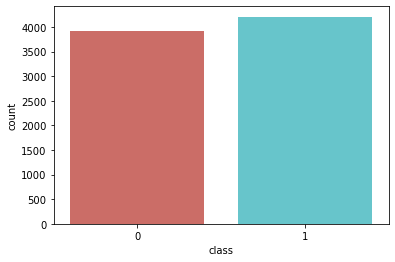

In [7]:
sb.countplot(x='class', data=finalData, palette='hls')
plt.show()

In [8]:
count_trujace = len(finalData[finalData['class']==0])
count_jadalne = len(finalData[finalData['class']==1])
pct_trujace = count_trujace/(count_jadalne+count_trujace)
pct_jadalne = count_jadalne/(count_jadalne+count_trujace)
print("Udział procentowy grzybów jadalnych to:", pct_jadalne)
print("Udział procentowy grzybów trujących to:", pct_trujace)

Udział procentowy grzybów jadalnych to: 0.517971442639094
Udział procentowy grzybów trujących to: 0.48202855736090594


Średnie zmiennych x przyporządkowane do grup grzybów jadalnych(1) oraz trujących(0)

In [9]:
finalData.groupby('class').mean()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
0,1.822,0.836,2.170,0.841,4.529,0.005,0.029,0.432,5.417,0.515,...,1.730,1.515,1.230,0.000,0.006,0.037,1.150,3.213,2.910,3.115
1,1.466,1.099,2.023,0.346,2.715,0.046,0.285,0.932,3.211,0.616,...,0.310,0.810,0.905,0.000,0.068,0.125,0.274,1.259,2.481,2.496


W większości zmiennych wyższe średnie wskazują na przyporządkowanie do grupy grzybów trujących.

In [10]:
finalData.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,...,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000,8124.000
mean,0.518,1.638,0.972,2.094,0.584,3.589,0.026,0.161,0.691,4.274,...,0.995,1.150,1.062,0.000,0.038,0.083,0.696,2.201,2.688,2.795
std,0.500,1.589,0.776,1.745,0.493,1.558,0.159,0.368,0.462,2.670,...,1.333,1.564,1.649,0.000,0.258,0.291,0.787,1.742,1.381,1.618
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,2.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2.000,1.000
50%,1.000,1.000,1.000,2.000,1.000,3.000,0.000,0.000,1.000,4.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,3.000,3.000,3.000
75%,1.000,3.000,2.000,3.000,1.000,4.000,0.000,0.000,1.000,6.000,...,3.000,2.000,1.000,0.000,0.000,0.000,1.000,4.000,4.000,4.000
max,1.000,5.000,3.000,9.000,1.000,8.000,1.000,1.000,1.000,11.000,...,3.000,8.000,8.000,0.000,3.000,2.000,4.000,8.000,5.000,6.000


Korrelacja X Y

In [11]:
corrYX = finalData.corr(method='pearson', min_periods=1).iloc[:,0:1]
corrYX


,class
class,1.000
cap-shape,-0.112
cap-surface,0.170
cap-color,-0.042
bruises,-0.502
odor,-0.582
gill-attachment,0.129
gill-spacing,0.348
gill-size,0.540
gill-color,-0.413


<AxesSubplot:>

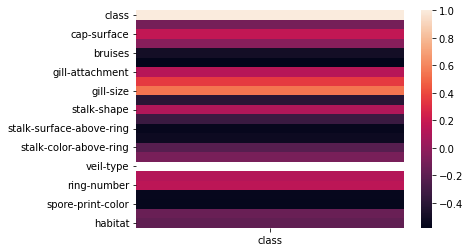

In [12]:
sb.heatmap(finalData.corr(method='pearson', min_periods=1).iloc[:,0:1])
#sb.heatmap(finalData.corr(method='pearson', min_periods=1),cmap="Reds",annot=True)

Metoda KKN

In [13]:
finalData.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


In [14]:
# Podział na zmienne objaśniające X oraz zmienną objaśnianą Y oraz usunięcie zmiennych jakościowych
X = finalData.iloc[:, [4,7,8,18,21]].values
y = finalData.iloc[:, 0].values 

# Podział danych na zbiory testowe oraz treningowe:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

# Standaryzacja danych treningowych, usuwając średnią i skalując do wariancji jednostek:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Użycie metody KNN z różną ilością sąsiadów, aby dopasować dane możliwie jak najlepiej
for neighbors in range(3,20,2):
    classifier = KNeighborsClassifier(n_neighbors = neighbors)
    classifier.fit(X_train, y_train) 
    # Przewidywanie y za pomocą klasyfikatora
    y_predict = classifier.predict(X_test)
    print(f"Dla n_neighbors={neighbors} macierz błędu:")
    print(confusion_matrix(y_test, y_predict))

Dla n_neighbors=3 macierz błędu:
[[728  56]
 [ 57 784]]
Dla n_neighbors=5 macierz błędu:
[[728  56]
 [ 57 784]]
Dla n_neighbors=7 macierz błędu:
[[728  56]
 [ 57 784]]
Dla n_neighbors=9 macierz błędu:
[[728  56]
 [ 57 784]]
Dla n_neighbors=11 macierz błędu:
[[728  56]
 [ 57 784]]
Dla n_neighbors=13 macierz błędu:
[[720  64]
 [ 48 793]]
Dla n_neighbors=15 macierz błędu:
[[719  65]
 [ 48 793]]
Dla n_neighbors=17 macierz błędu:
[[719  65]
 [ 48 793]]
Dla n_neighbors=19 macierz błędu:
[[719  65]
 [ 48 793]]


Szczególną uwagę należy zwrócić na ilość false negative, ponieważ oznaczenie trującego grzyba jako jadalny jest znacznie gorsze niż sytuacja odwrotna. Zauważamy że dla liczby sąsiadów > 9 wyniki już się nie poprawiają, więc dla zminimalizowania zużycia zasobów obliczeniowych ustalamy że 9 to optymalna liczba.

In [15]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       784
           1       0.92      0.94      0.93       841

    accuracy                           0.93      1625
   macro avg       0.93      0.93      0.93      1625
weighted avg       0.93      0.93      0.93      1625



Regresja logistyczna

In [16]:
x = finalData.iloc[:, 1:].values
y = finalData.iloc[:, 0].values 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [17]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(X_train) 
xtest = sc_x.transform(X_test)

print (xtrain[0:10, :])

[[ 8.55559024e-01  3.51738936e-02 -6.28242666e-01  8.42090500e-01
   2.63691143e-01 -1.57781081e-01 -4.40458315e-01  6.73668787e-01
  -4.83448117e-01 -1.14825657e+00 -2.11084191e-01  1.47841921e+00
   1.50213486e+00  1.83738755e+00  1.81105084e+00  0.00000000e+00
  -1.43230239e-01 -2.86607922e-01  1.65386841e+00  4.59464941e-01
   9.46017710e-01 -1.10501333e+00]
 [-1.03158511e+00  3.51738936e-02 -1.19956842e+00 -1.18752082e+00
  -1.02164496e+00 -1.57781081e-01 -4.40458315e-01  6.73668787e-01
  -1.08062699e-01 -1.14825657e+00  5.34501882e-01 -7.26453692e-01
   7.52236645e-01 -7.35630684e-01 -6.42338692e-01  0.00000000e+00
  -1.43230239e-01 -2.86607922e-01 -8.91155007e-01 -6.91416821e-01
   9.46017710e-01 -1.10501333e+00]
 [ 8.55559024e-01 -1.25587751e+00  5.14408846e-01  8.42090500e-01
  -3.78976910e-01 -1.57781081e-01  2.27036241e+00  6.73668787e-01
  -1.60960437e+00  8.70885502e-01 -1.70225634e+00  3.75982758e-01
   2.33843198e-03 -7.35630684e-01 -6.42338692e-01  0.00000000e+00
  -1.4

In [18]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred = classifier.predict(xtest)

Macierz błędu

In [20]:

cm = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 965    5]
 [  11 1050]]


Specyficzność

In [21]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn+fp)
print(specificity)

0.9948453608247423


Prognoza negatywna(0) pokryła prawie całość klasy negatywnej. To aż 99,48%.

Czułość

In [22]:
sensivity = tp / (tp + fn)
print(sensivity)

0.9896324222431668


Przwidywanie pozytywne(1) pokryło bardzo dużą część klasy pozytywnej.
Wynik wyniósł 98,96%.

Skuteczność modelu

In [23]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9921221073362876


Skuteczność modelu wynosząca 99,21% uzyskana za pomocą metody regresji logistycznej to bardzo dobry rezultat.

Liniowa analiza dyskryminacyjna

In [33]:

X = finalData.iloc[:, 1:].values
y = finalData.iloc[:, 0].values

model = LinearDiscriminantAnalysis()

cv = RepeatedStratifiedKFold(n_splits=13, n_repeats=7, random_state=1)

scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Średnia dokładność %.3f (%.3f)' % (mean(scores), std(scores)))

Średnia dokładność 0.962 (0.007)
